In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from numpy import mean,std
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from pickle import dump

## 1.data collection

In [66]:
data = pd.read_csv('Datasets/Fraud_check.csv')
data.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## 2.Data Analysis

In [5]:
data.shape

(600, 6)

In [6]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

## 3.Data preprocesssing

In [22]:
data['Status'] = data['Taxable.Income'].apply(lambda x : 'Risky' if x<=30000  else 'Good')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [23]:
data.rename({'Undergrad':'graduation','Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income'
            ,'City.Population':'City_Population','Work.Experience':'Work_Experience'},axis=1,inplace=True)

In [24]:
data = pd.get_dummies(data=data,columns=['graduation','Marital_Status','Urban'])

In [25]:
lbl_encode = LabelEncoder()
data['Status'] = lbl_encode.fit_transform(data['Status'])
data.head()

,Taxable_Income,City_Population,Work_Experience,Status,graduation_NO,graduation_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,0,1,0,0,0,1,0,1
1,33700,134075,18,0,0,1,1,0,0,0,1
2,36925,160205,30,0,1,0,0,1,0,0,1
3,50190,193264,15,0,0,1,0,0,1,0,1
4,81002,27533,28,0,1,0,0,1,0,1,0


In [27]:
data.isna().sum()

Taxable_Income             0
City_Population            0
Work_Experience            0
Status                     0
graduation_NO              0
graduation_YES             0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

## spliting X and y

In [28]:
X = data.drop(labels=('Status'),axis=1)
y = data[['Status']]

In [29]:
X.head()

,Taxable_Income,City_Population,Work_Experience,graduation_NO,graduation_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [30]:
y.head()

,Status
0,0
1,0
2,0
3,0
4,0


### train test split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,shuffle=True,random_state=37,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((510, 10), (90, 10), (510, 1), (90, 1))

## 4.Model cros validation and hyperparameter tuning

## Model cross validation for decision tree algoritm

In [45]:
cv = StratifiedKFold(n_splits=10,random_state=32,shuffle=True)

cv_scores = cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,scoring='accuracy',cv=cv)
print(cv_scores)
print('using decisiontree without hyperparameter tuning, for this data will give a minimum accuracy of :',mean(cv_scores))
print('with a standard deviation of :',std(cv_scores))

[1.         1.         0.98039216 1.         1.         1.
 1.         1.         1.         1.        ]
using decisiontree without hyperparameter tuning, for this data will give a minimum accuracy of : 0.9980392156862745
with a standard deviation of : 0.005882352941176483


## Hyper parameter tuning

In [42]:
params = {'criterion':["gini", "entropy"],
          'max_depth':[3,4,5,6,7,8],
          'random_state':[12,20,30]
          }

grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,cv=cv)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'random_state': 12}

## model cross validation using the best hyper parameters

In [46]:

cv_scores = cross_val_score(estimator=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=12),X=X_train,y=y_train,scoring='accuracy',cv=cv)
print(cv_scores)
print('using decisiontree with hyperparameter tuning, for this data will give a minimum accuracy of :',mean(cv_scores))
print('with a standard deviation of :',std(cv_scores))

[1.         1.         0.98039216 1.         1.         1.
 1.         1.         1.         1.        ]
using decisiontree with hyperparameter tuning, for this data will give a minimum accuracy of : 0.9980392156862745
with a standard deviation of : 0.005882352941176483


## 5.BASE MODEL
### 5.1 model building


In [47]:
base_model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=12)

### 5.2 Model training

In [48]:
base_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=12)

### 5.3 Model testing and evaluation


In [49]:
y_pred = base_model.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

1.0

In [52]:
confusion_matrix(y_test,y_pred)

array([[71,  0],
       [ 0, 19]])

In [53]:
print('\n',classification_report(y_test,y_pred))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        19

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



## ROC,AUC curve

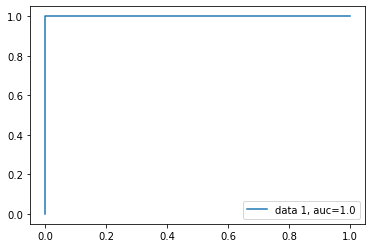

In [67]:
y_pred_prob = base_model.predict_proba(X_test)[::,1]
fpr,tpr,_ = roc_curve(y_test,y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## since base model is giving best accuracy,we will take this as final model

## Model deployment

In [69]:
dump(base_model,open('fraud_prediction.pkl','wb'))